<a href="https://colab.research.google.com/github/Hbus2/Analysis-Projects/blob/main/Fitness_Retention_Insights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive





**Project Overview**

This notebook demonstrates my Python skills and provides insights into client churn at the gym. The data used is sourced from a script I generated, and it has been thoroughly cleaned and checked for null values and duplicates.






### **Churn Analysis: Comparing and Contrasting Male and Female Clients**

#### **1. Age Comparison:**

   - **Churned Male Clients**:  
     - **Median Age**: 38 years  
     - **Q1**: 31.75 years  
     - **Q3**: 45.75 years  
     - **Range**: 25 to 64 years  
     - **Interquartile Range (IQR)**: 14 years  
     - **Insight**: The age distribution among churned males shows a relatively wide spread, with younger males (around 38) making up a significant portion of churn. The IQR of 14 years suggests moderate variability.

   - **Churned Female Clients**:  
     - **Median Age**: 54 years  
     - **Q1**: 48.75 years  
     - **Q3**: 56.25 years  
     - **Range**: 25 to 62 years  
     - **Interquartile Range (IQR)**: 7.5 years  
     - **Insight**: The churned female clients tend to be older, with the median age at 54 years. The IQR of 7.5 years is smaller, indicating less age variation compared to males.

   - **Contrast**:  
     - There is a significant **age gap** between churned male and female clients. Females are **16 years older** on average.  
     - Males show a wider **age range** (IQR of 14 years) compared to females (IQR of 7.5 years).  
     - This suggests that the **age-related needs and motivations** for these two groups differ, with older females more likely to churn.

---

#### **2. Distance Traveled:**

   - **Churned Male Clients**:  
     - **Average Distance**: 10.81 miles  
     - **Insight**: Male clients generally travel **slightly further** than females to reach the gym.

   - **Churned Female Clients**:  
     - **Average Distance**: 10.42 miles  
     - **Insight**: Female clients travel a bit less than males but still show that **distance is a factor** in churn for both genders.

   - **Contrast**:  
     - Males travel **slightly further** on average, but the difference in distance is minimal.  
     - **Distance** plays a key role in retention for both groups, implying that **location** impacts churn.

---

#### **3. Advanced Fitness Clients:**

   - **Churned Advanced Female Clients**:  
     - **Average Distance**: 11.57 miles  
     - **Average Attendance**: 15.27 visits  
     - **Insight**: Advanced female clients tend to **travel further** and attend the gym **more frequently** before churning, which suggests a higher engagement level.

   - **Churned Advanced Male Clients**:  
     - **Average Distance**: 11.76 miles  
     - **Average Attendance**: 14.73 visits  
     - **Insight**: Male advanced clients travel slightly **further** but have **slightly fewer visits** compared to females.

   - **Contrast**:  
     - Both genders exhibit **similar travel distances**.  
     - **Females attend more frequently**, which might suggest they are more committed or motivated to engage with the gym.

---

#### **4. Income and Churn (Income < $30,000):**

   - **Churned Female Clients (< $30,000)**:  
     - **Average Distance**: 11.04 miles  
     - **Insight**: Female clients in the lower income bracket travel an average of **11.04 miles** to the gym.

   - **Churned Male Clients (< $30,000)**:  
     - **Average Distance**: 12.38 miles  
     - **Insight**: Male clients in the same income bracket travel an average of **12.38 miles**, significantly further than females.

   - **Contrast**:  
     - Males in the **<$30,000 income bracket** travel much **further** than females.  
     - This difference might reflect **financial constraints** or other socio-economic factors that impact their ability to attend the gym.

---

### **Key Insights**:

1. **Age Gap**: Churned males are significantly younger (median 38) than churned females (median 54). The difference in age suggests the need for **different approaches** for male and female retention strategies based on their age-related preferences.

2. **Distance Impact**: Both genders are similarly impacted by **distance** from the gym, with males traveling slightly further. This indicates that improving gym accessibility or providing **local alternatives** could help **reduce churn** for both groups.

3. **Advanced Fitness Clients**: Advanced female clients tend to be **more engaged**, attending more frequently before churning, which suggests **greater commitment**. Males are less frequent but still show high engagement levels, suggesting different motivations.

4. **Income-Driven Trends**: Males in the **<$30,000** income bracket travel significantly further than females in the same bracket. This could be due to **financial constraints** or lack of other available options, requiring **location-based solutions** for reducing churn in this income segment.

---

### **Recommendations**:

1. **Male Clients**:
   - Explore **promotions or gym expansion** in locations that are more convenient for males, particularly those in the **<$30,000** income bracket, who are traveling farther.
   
2. **Female Clients**:
   - Tailor retention strategies to meet the needs of **older women**, particularly those around the **54-year-old median** age, with a focus on health and wellness programs suited for their demographics.

3. **Income-Based Solutions**:
   - Implement **discounts, subsidized memberships**, or create **alternate membership options** for clients who travel long distances, especially those in lower income brackets. Consider offering **more flexible pricing** for these groups.



In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
from tabulate import tabulate

#DataSet
df = pd.read_csv('/content/drive/MyDrive/cleaned_table_gym_g.csv')
display(df.head())

# Find out how many clients churned and did not churn
churned_clients = df[df['Churn'] == True].shape[0]
non_churned_clients = df[df['Churn'] == False].shape[0]

# Total Number of Clients
total_clients = churned_clients + non_churned_clients


print(f'Total number of churned clients: {churned_clients}')
print(f'Total number of non-churned clients: {non_churned_clients}')
print(f'Total number of clients: {total_clients}')
print("Let's dive further into the data, based on non churned and churned clients analyzing each fitness levels")

,Client ID,First Name,Last Name,Gender,Age,Active Months,Fitness Level,Income Bracket,Member Distance(miles),Attendance Frequency,Churn
0,C001,Arron,Clark,Male,33,24,Beginner,"<$30,000",14.53,4,False
1,C002,Arron,Rodriguez,Male,42,24,Intermediate,"> $100,000",6.78,12,False
2,C003,Lyric,Wilson,Female,24,24,Intermediate,"$60,000 - $100,000",9.74,14,False
3,C004,Bri,Windsor,Female,25,24,Beginner,"$60,000 - $100,000",14.73,3,False
4,C005,Matthew,Clark,Male,65,24,Beginner,"$30,000 - $60,000",9.96,10,True


Total number of churned clients: 43
Total number of non-churned clients: 257
Total number of clients: 300
Let's dive further into the data, based on non churned and churned clients analyzing each fitness levels


In [10]:
active_members = df[df['Churn'] == False]

fitness_level_counts = active_members['Fitness Level'].value_counts()

fitness_level_counts_df = fitness_level_counts.reset_index()
fitness_level_counts_df.columns = ['Fitness Level', 'Number of Active Clients']

gender_by_level = active_members.groupby(['Fitness Level', 'Gender']).size().reset_index(name='Count')

gender_by_level_pivot = gender_by_level.pivot(index='Fitness Level', columns='Gender', values='Count').fillna(0)

combined_df = fitness_level_counts_df.merge(gender_by_level_pivot, on='Fitness Level', how='left')

print("Active Clients by Fitness Level and Gender")
combined_df

Active Clients by Fitness Level and Gender


,Fitness Level,Number of Active Clients,Female,Male
0,Intermediate,95,44,51
1,Beginner,92,45,47
2,Advanced,70,34,36


In [11]:
# Filter data for churned clients in the <$30,000 income bracket
churned_under_30k = df[(df['Churn'] == True) & (df['Income Bracket'] == '<$30,000')]

# Calculate the average distance traveled for churned female clients in <$30,000
average_distance_female_under_30k = churned_under_30k[churned_under_30k['Gender'] == 'Female']['Member Distance(miles)'].mean()

# Calculate the average distance traveled for churned male clients in <$30,000
average_distance_male_under_30k = churned_under_30k[churned_under_30k['Gender'] == 'Male']['Member Distance(miles)'].mean()

# Print results
print(f"Average Distance Traveled for Churned Female Clients (<$30,000): {average_distance_female_under_30k:.2f} miles")
print(f"Average Distance Traveled for Churned Male Clients (<$30,000): {average_distance_male_under_30k:.2f} miles")


Average Distance Traveled for Churned Female Clients (<$30,000): 11.04 miles
Average Distance Traveled for Churned Male Clients (<$30,000): 12.38 miles


In [12]:
# Filter the data for churned clients
churned_clients = df[df['Churn'] == True]

# Calculate the average distance traveled for all churned female and male clients
average_distance_female = churned_clients[churned_clients['Gender'] == 'Female']['Member Distance(miles)'].mean()
average_distance_male = churned_clients[churned_clients['Gender'] == 'Male']['Member Distance(miles)'].mean()

# Filter the data for churned clients in the Advanced fitness bracket
churned_advanced_clients = churned_clients[churned_clients['Fitness Level'] == 'Advanced']

# Calculate the average distance traveled for churned advanced female and male clients
average_distance_female_advanced = churned_advanced_clients[churned_advanced_clients['Gender'] == 'Female']['Member Distance(miles)'].mean()
average_distance_male_advanced = churned_advanced_clients[churned_advanced_clients['Gender'] == 'Male']['Member Distance(miles)'].mean()

# Calculate the average attendance frequency for churned advanced female and male clients
average_attendance_female_advanced = churned_advanced_clients[churned_advanced_clients['Gender'] == 'Female']['Attendance Frequency'].mean()
average_attendance_male_advanced = churned_advanced_clients[churned_advanced_clients['Gender'] == 'Male']['Attendance Frequency'].mean()

# Print all the results
print(f"Average Distance Traveled for Churned Female Clients: {average_distance_female:.2f} miles")
print(f"Average Distance Traveled for Churned Male Clients: {average_distance_male:.2f} miles")
print(f"\nAverage Distance Traveled for Churned Advanced Female Clients: {average_distance_female_advanced:.2f} miles")
print(f"Average Distance Traveled for Churned Advanced Male Clients: {average_distance_male_advanced:.2f} miles")
print(f"\nAverage Attendance Frequency for Churned Advanced Female Clients: {average_attendance_female_advanced:.2f}")
print(f"Average Attendance Frequency for Churned Advanced Male Clients: {average_attendance_male_advanced:.2f}")


Average Distance Traveled for Churned Female Clients: 10.42 miles
Average Distance Traveled for Churned Male Clients: 10.81 miles

Average Distance Traveled for Churned Advanced Female Clients: 11.57 miles
Average Distance Traveled for Churned Advanced Male Clients: 11.76 miles

Average Attendance Frequency for Churned Advanced Female Clients: 15.27
Average Attendance Frequency for Churned Advanced Male Clients: 14.73


In [13]:
# Filter out Advanced fitness level and churned clients only
non_advanced_churned = df[(df['Fitness Level'] != 'Advanced') & (df['Churn'] == True)]

# Calculate average distance traveled for each non-advanced fitness level for females (churned)
average_distance_female_per_level = (
    non_advanced_churned[non_advanced_churned['Gender'] == 'Female']
    .groupby('Fitness Level')['Member Distance(miles)']
    .mean()
)

# Calculate average distance traveled for each non-advanced fitness level for males (churned)
average_distance_male_per_level = (
    non_advanced_churned[non_advanced_churned['Gender'] == 'Male']
    .groupby('Fitness Level')['Member Distance(miles)']
    .mean()
)

# Calculate overall average distance traveled for all non-advanced fitness levels for females (churned)
average_distance_combined_female = non_advanced_churned[non_advanced_churned['Gender'] == 'Female']['Member Distance(miles)'].mean()

# Calculate overall average distance traveled for all non-advanced fitness levels for males (churned)
average_distance_combined_male = non_advanced_churned[non_advanced_churned['Gender'] == 'Male']['Member Distance(miles)'].mean()

# Calculate average attendance for each non-advanced fitness level for females (churned)
average_attendance_female_per_level = (
    non_advanced_churned[non_advanced_churned['Gender'] == 'Female']
    .groupby('Fitness Level')['Attendance Frequency']
    .mean()
)

# Calculate average attendance for each non-advanced fitness level for males (churned)
average_attendance_male_per_level = (
    non_advanced_churned[non_advanced_churned['Gender'] == 'Male']
    .groupby('Fitness Level')['Attendance Frequency']
    .mean()
)

# Calculate overall average attendance for all non-advanced fitness levels for females (churned)
average_attendance_combined_female = non_advanced_churned[non_advanced_churned['Gender'] == 'Female']['Attendance Frequency'].mean()

# Calculate overall average attendance for all non-advanced fitness levels for males (churned)
average_attendance_combined_male = non_advanced_churned[non_advanced_churned['Gender'] == 'Male']['Attendance Frequency'].mean()

# Print results for females
print("Average Distance Traveled for Non-Advanced Fitness Levels (Churned Female):")
print(average_distance_female_per_level)
print(f"\nCombined Average Distance Traveled for All Non-Advanced Fitness Levels (Churned Female): {average_distance_combined_female:.2f} miles")

print("\nAverage Attendance for Non-Advanced Fitness Levels (Churned Female):")
print(average_attendance_female_per_level)
print(f"\nCombined Average Attendance for All Non-Advanced Fitness Levels (Churned Female): {average_attendance_combined_female:.2f}")

# Print results for males
print("\nAverage Distance Traveled for Non-Advanced Fitness Levels (Churned Male):")
print(average_distance_male_per_level)
print(f"\nCombined Average Distance Traveled for All Non-Advanced Fitness Levels (Churned Male): {average_distance_combined_male:.2f} miles")

print("\nAverage Attendance for Non-Advanced Fitness Levels (Churned Male):")
print(average_attendance_male_per_level)
print(f"\nCombined Average Attendance for All Non-Advanced Fitness Levels (Churned Male): {average_attendance_combined_male:.2f}")


Average Distance Traveled for Non-Advanced Fitness Levels (Churned Female):
Fitness Level
Beginner        8.250
Intermediate    9.622
Name: Member Distance(miles), dtype: float64

Combined Average Distance Traveled for All Non-Advanced Fitness Levels (Churned Female): 9.01 miles

Average Attendance for Non-Advanced Fitness Levels (Churned Female):
Fitness Level
Beginner         5.75
Intermediate    10.20
Name: Attendance Frequency, dtype: float64

Combined Average Attendance for All Non-Advanced Fitness Levels (Churned Female): 8.22

Average Distance Traveled for Non-Advanced Fitness Levels (Churned Male):
Fitness Level
Beginner        8.728
Intermediate    9.500
Name: Member Distance(miles), dtype: float64

Combined Average Distance Traveled for All Non-Advanced Fitness Levels (Churned Male): 9.02 miles

Average Attendance for Non-Advanced Fitness Levels (Churned Male):
Fitness Level
Beginner        7.200000
Intermediate    8.333333
Name: Attendance Frequency, dtype: float64

Combined

In [14]:
# Median Age for Churned Clients
churned_male_clients = df[(df['Churn'] == True) & (df['Gender'] == 'Male')]
churned_female_clients = df[(df['Churn'] == True) & (df['Gender'] == 'Female')]

median_age_churned_male = churned_male_clients['Age'].median()
median_age_churned_female = churned_female_clients['Age'].median()

# Print the difference for churned clients
print(f"Median Age for Churned Male Clients: {median_age_churned_male}")
print(f"Median Age for Churned Female Clients: {median_age_churned_female}")
print(f"Difference in Median Age (Churned): {median_age_churned_male - median_age_churned_female}")

Median Age for Churned Male Clients: 38.0
Median Age for Churned Female Clients: 54.0
Difference in Median Age (Churned): -16.0


**Breaking down the churned data by Income Bracket**

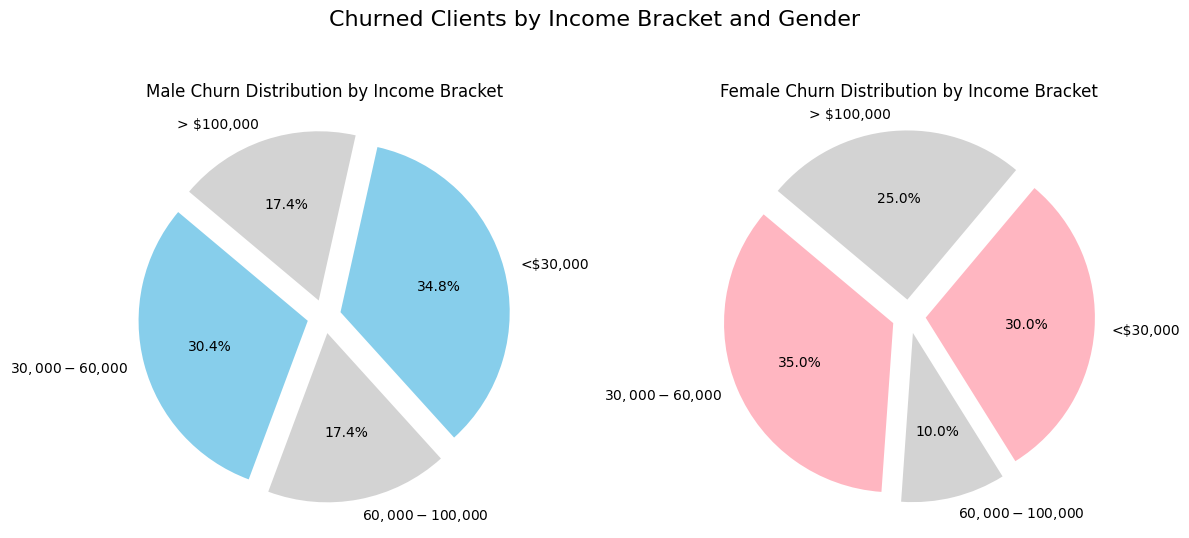

In [15]:
# Step 1: Filter churned clients
churned_clients = df[df['Churn'] == 1]

# Step 2: Group by Income Bracket and Gender
churned_by_income_gender = churned_clients.groupby(['Income Bracket', 'Gender']).size().unstack(fill_value=0)

# Step 3: Define custom colors for each gender
male_colors = ['skyblue', 'lightgray', 'skyblue', 'lightgray']
female_colors = ['lightpink', 'lightgray', 'lightpink', 'lightgray']

# Step 4: Plot dual pie charts for Male and Female churn, breaking down by income bracket
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Pie chart for Males
axs[0].pie(
    churned_by_income_gender['Male'],
    labels=churned_by_income_gender.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=male_colors,
    explode=[0.1] * len(churned_by_income_gender.index)
)
axs[0].set_title('Male Churn Distribution by Income Bracket')

# Pie chart for Females
axs[1].pie(
    churned_by_income_gender['Female'],
    labels=churned_by_income_gender.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=female_colors,
    explode=[0.1] * len(churned_by_income_gender.index)
)
axs[1].set_title('Female Churn Distribution by Income Bracket')

# Add a main title
plt.suptitle('Churned Clients by Income Bracket and Gender', fontsize=16)

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()


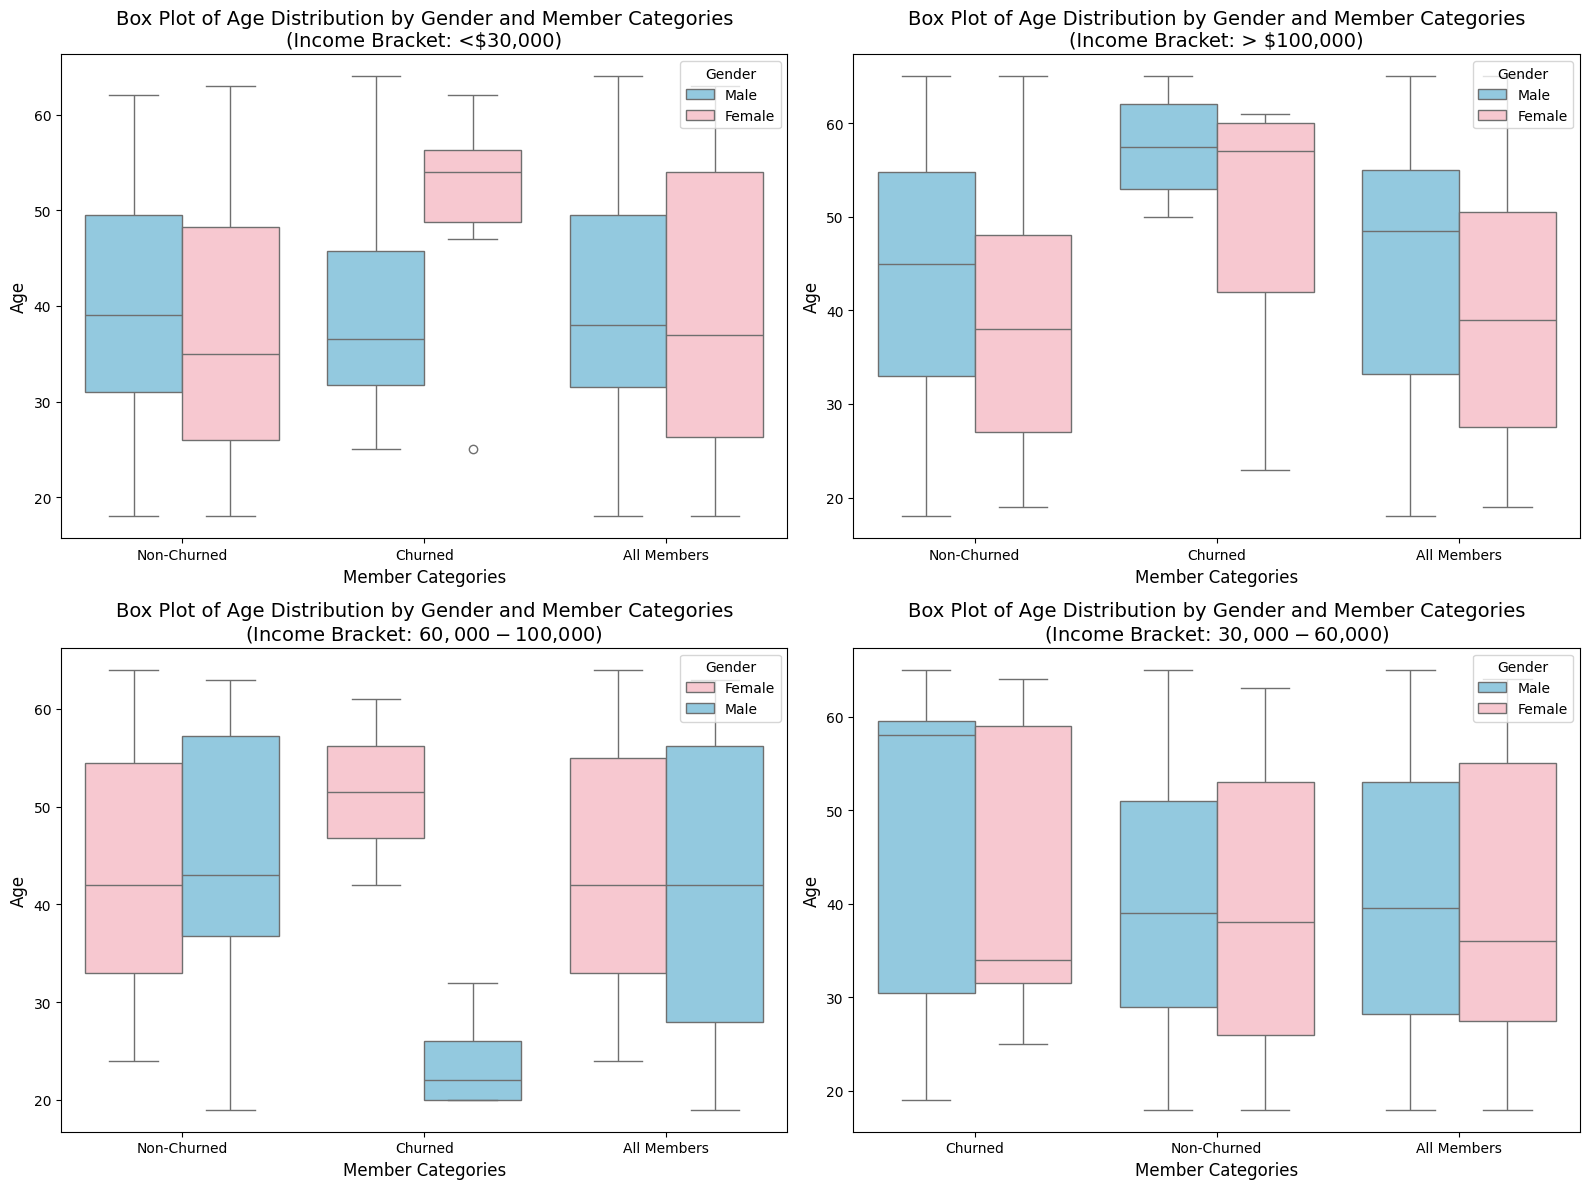


Income Bracket: <$30,000
Median Age of Churned Male Clients: 36.5
Median Age of Churned Female Clients: 54.0
Median Age Difference Between Churned Male and Female Clients: 17.5

Income Bracket: > $100,000
Median Age of Churned Male Clients: 57.5
Median Age of Churned Female Clients: 57.0
Median Age Difference Between Churned Male and Female Clients: 0.5

Income Bracket: $60,000 - $100,000
Median Age of Churned Male Clients: 22.0
Median Age of Churned Female Clients: 51.5
Median Age Difference Between Churned Male and Female Clients: 29.5

Income Bracket: $30,000 - $60,000
Median Age of Churned Male Clients: 58.0
Median Age of Churned Female Clients: 34.0
Median Age Difference Between Churned Male and Female Clients: 24.0


In [16]:
# Define custom gender palette
gender_palette = {"Female": "pink", "Male": "skyblue"}

# Create a figure with subplots (2 rows, 2 columns)
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Flatten axes array for easier indexing
axes = axes.flatten()

# Get the unique income brackets directly from the DataFrame
income_brackets = df['Income Bracket'].unique()

# Loop through each income bracket and create the respective box plots
for idx, income_bracket in enumerate(income_brackets):
    # Filter the data for the desired income bracket
    filtered_df = df[df['Income Bracket'] == income_bracket].copy()

    # Ensure 'Category' column exists (Churned vs Non-Churned)
    filtered_df['Category'] = filtered_df['Churn'].replace({True: 'Churned', False: 'Non-Churned'})

    # Combine all members as a separate category
    all_members_filtered_df = filtered_df.copy()
    all_members_filtered_df['Category'] = 'All Members'

    # Merge non-churned, churned, and all members data
    boxplot_gender_df = pd.concat([filtered_df, all_members_filtered_df], ignore_index=True)

    # Plot the box plot using seaborn on the appropriate subplot
    sns.boxplot(
        data=boxplot_gender_df,
        x='Category',
        y='Age',
        hue='Gender',
        palette=gender_palette,  # Use the custom gender palette
        ax=axes[idx]
    )

    # Add titles and labels
    axes[idx].set_title(f"Box Plot of Age Distribution by Gender and Member Categories\n(Income Bracket: {income_bracket})", fontsize=14)
    axes[idx].set_ylabel("Age", fontsize=12)
    axes[idx].set_xlabel("Member Categories", fontsize=12)

    # Add legend for gender
    axes[idx].legend(title="Gender", loc='upper right')

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()

# Calculate median ages for churned male and female clients for each income bracket
for income_bracket in income_brackets:
    filtered_df = df[df['Income Bracket'] == income_bracket].copy()

    # Ensure 'Category' column exists (Churned vs Non-Churned)
    filtered_df['Category'] = filtered_df['Churn'].replace({True: 'Churned', False: 'Non-Churned'})

    # Median ages for churned male and female clients
    churned_male_median_age = filtered_df[(filtered_df['Category'] == 'Churned') & (filtered_df['Gender'] == 'Male')]['Age'].median()
    churned_female_median_age = filtered_df[(filtered_df['Category'] == 'Churned') & (filtered_df['Gender'] == 'Female')]['Age'].median()

    # Calculate the age difference
    age_difference = abs(churned_male_median_age - churned_female_median_age)

    # Print the results for the income bracket
    print(f"\nIncome Bracket: {income_bracket}")
    print(f"Median Age of Churned Male Clients: {churned_male_median_age}")
    print(f"Median Age of Churned Female Clients: {churned_female_median_age}")
    print(f"Median Age Difference Between Churned Male and Female Clients: {age_difference}")


In [31]:
warnings.filterwarnings("ignore", category=DeprecationWarning)
#Function to calculate IQR, min, max, and median
def calculate_stats(group_df):
    return pd.Series({
        'Min': group_df['Age'].min(),
        'Q1': group_df['Age'].quantile(0.25),
        'Median': group_df['Age'].median(),
        'Q3': group_df['Age'].quantile(0.75),
        'Max': group_df['Age'].max()
    })

# Get the unique income brackets directly from the DataFrame
income_brackets = df['Income Bracket'].unique()

# Create a list to store results for Non-Churned and Churned
non_churned_results = []
churned_results = []

# Loop through each income bracket
for income_bracket in income_brackets:
    # Filter data for the current income bracket
    filtered_non_churned = df[(df['Income Bracket'] == income_bracket) & (df['Churn'] == False)].copy()
    filtered_churned = df[(df['Income Bracket'] == income_bracket) & (df['Churn'] == True)].copy()

    # Calculate stats for Non-Churned and Churned
    non_churned_stats = filtered_non_churned.groupby('Gender').apply(calculate_stats).reset_index()
    churned_stats = filtered_churned.groupby('Gender').apply(calculate_stats).reset_index()

    # Add Income Bracket as a column for both
    non_churned_stats['Income Bracket'] = income_bracket
    churned_stats['Income Bracket'] = income_bracket

    # Append results to separate lists
    non_churned_results.append(non_churned_stats)
    churned_results.append(churned_stats)

# Combine all results into two separate DataFrames
non_churned_df = pd.concat(non_churned_results, ignore_index=True)
churned_df = pd.concat(churned_results, ignore_index=True)

# Rearrange columns for clarity
non_churned_df = non_churned_df[['Income Bracket', 'Gender', 'Min', 'Q1', 'Median', 'Q3', 'Max']]
churned_df = churned_df[['Income Bracket', 'Gender', 'Min', 'Q1', 'Median', 'Q3', 'Max']]

# Print the results in a clean format (side by side)
print("Non-Churned Members:")
print(tabulate(non_churned_df, headers='keys', tablefmt='grid', showindex=False))
print("\nChurned Members:")
print(tabulate(churned_df, headers='keys', tablefmt='grid', showindex=False))


Non-Churned Members:
+--------------------+----------+-------+-------+----------+-------+-------+
| Income Bracket     | Gender   |   Min |    Q1 |   Median |    Q3 |   Max |
+====================+==========+=======+=======+==========+=======+=======+
| <$30,000           | Female   |    18 | 26    |       35 | 48.25 |    63 |
+--------------------+----------+-------+-------+----------+-------+-------+
| <$30,000           | Male     |    18 | 31    |       39 | 49.5  |    62 |
+--------------------+----------+-------+-------+----------+-------+-------+
| > $100,000         | Female   |    19 | 27    |       38 | 48    |    65 |
+--------------------+----------+-------+-------+----------+-------+-------+
| > $100,000         | Male     |    18 | 33    |       45 | 54.75 |    65 |
+--------------------+----------+-------+-------+----------+-------+-------+
| $60,000 - $100,000 | Female   |    24 | 33    |       42 | 54.5  |    64 |
+--------------------+----------+-------+-------+------

**Analyzing Age For Female Clients**

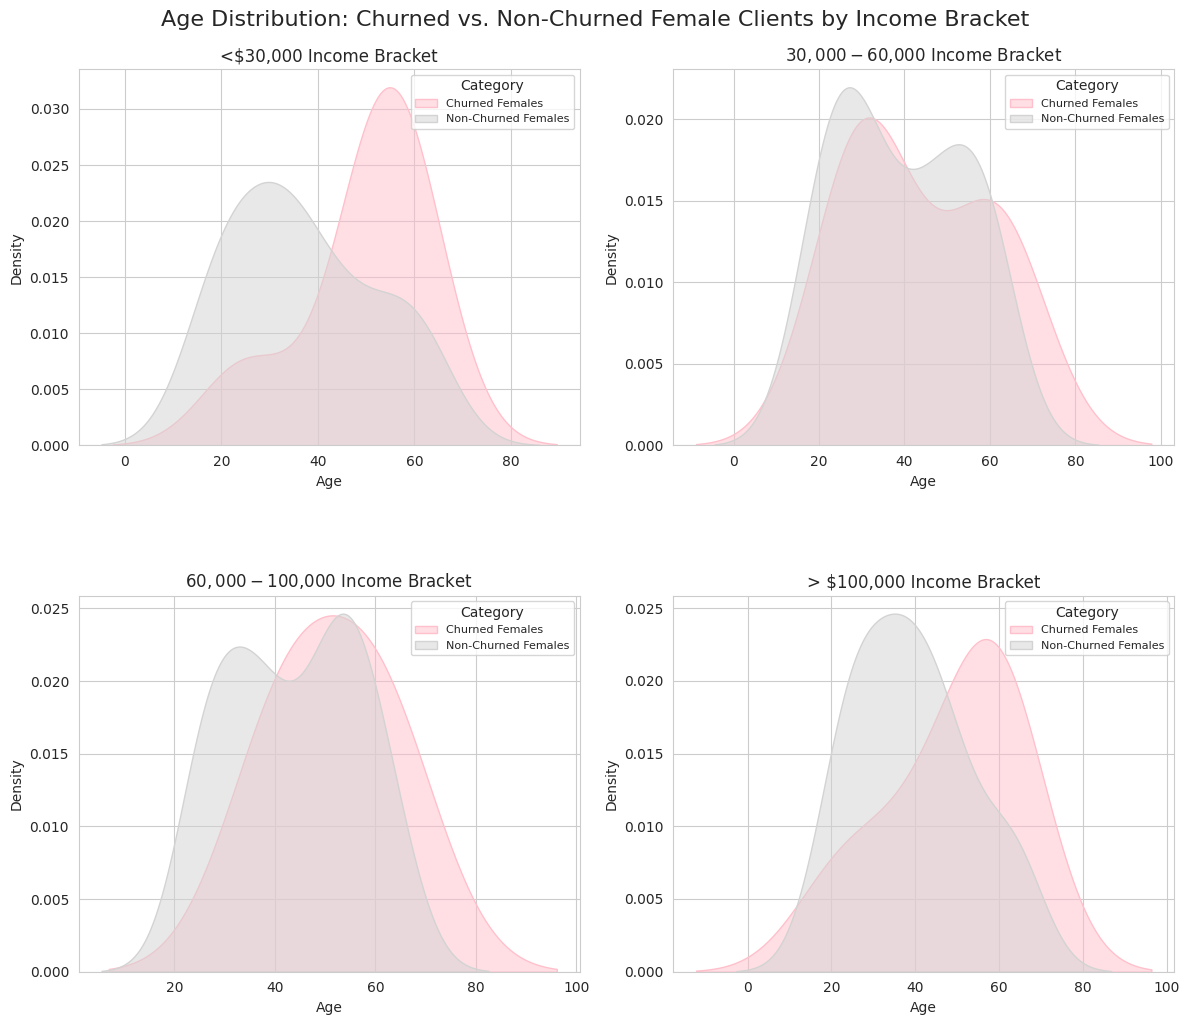

In [18]:
warnings.filterwarnings("ignore", category=FutureWarning)
# Filter data for female clients
female_clients = df[df["Gender"] == "Female"]

# Define income brackets
income_brackets = ['<$30,000', '$30,000 - $60,000', '$60,000 - $100,000', '> $100,000']

# Set up the overall figure for subplots
plt.figure(figsize=(12, 10))
sns.set_style("whitegrid")
sns.set_palette("pastel")

# Create a subplot for each income bracket
for i, bracket in enumerate(income_brackets, start=1):
    # Filter data for the current income bracket
    filtered_female_clients = female_clients[female_clients["Income Bracket"] == bracket]

    # Further filter for churned and non-churned females
    churned_female = filtered_female_clients[filtered_female_clients["Churn"] == True]
    non_churned_female = filtered_female_clients[filtered_female_clients["Churn"] == False]

    # Add a subplot for the current income bracket
    plt.subplot(2, 2, i)
    sns.kdeplot(churned_female["Age"], label="Churned Females", shade=True, color="pink", alpha=0.5)
    sns.kdeplot(non_churned_female["Age"], label="Non-Churned Females", shade=True, color="lightgrey", alpha=0.5)
    plt.title(f"{bracket} Income Bracket", fontsize=12)
    plt.xlabel("Age")
    plt.ylabel("Density")
    plt.legend(title="Category", fontsize=8)
    plt.tight_layout()

# Display the combined chart
plt.suptitle("Age Distribution: Churned vs. Non-Churned Female Clients by Income Bracket", fontsize=16, y=1.02)
plt.subplots_adjust(hspace=0.4)
plt.show()


<ipython-input-19-8238011a38d8>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churned_women['Age Range'] = pd.cut(


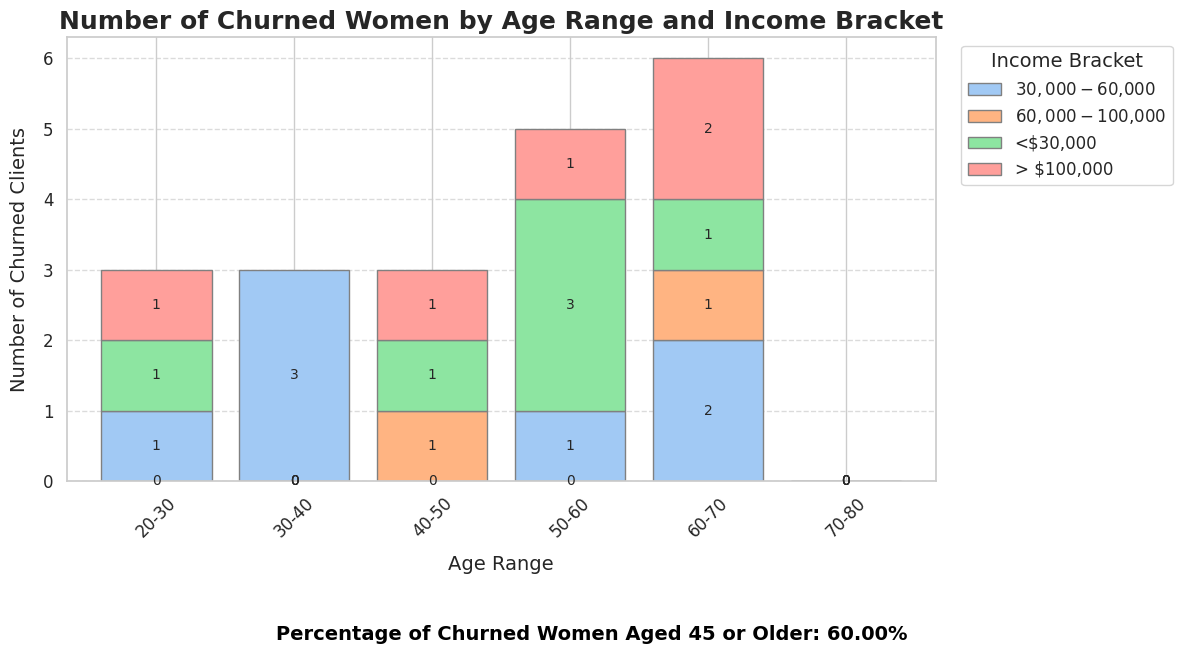

In [19]:
# Set seaborn style
sns.set_theme(style="whitegrid")

# Define age bins and labels
age_bins = range(20, 81, 10)  # Age ranges: 20-30, 30-40, ..., 70-80
age_labels = [f"{i}-{i+10}" for i in age_bins[:-1]]

# Filter the dataset for churned women
churned_women = df[
    (df['Gender'] == 'Female') &
    (df['Churn'] == True)
]

# Create a new column for age ranges
churned_women['Age Range'] = pd.cut(
    churned_women['Age'],
    bins=age_bins,
    labels=age_labels,
    right=False
)

# Group data by age range and income bracket
grouped_data = churned_women.groupby(['Age Range', 'Income Bracket']).size().unstack(fill_value=0)

# Calculate percentage of churned women aged 45 or older
total_churned_women = len(churned_women)
churned_45_or_older = len(churned_women[churned_women['Age'] >= 45])
percentage_45_or_older = (churned_45_or_older / total_churned_women) * 100

# Create a pastel color palette
pastel_colors = sns.color_palette("pastel")

# Plot the stacked bar chart
fig, ax = plt.subplots(figsize=(12, 6))
grouped_data.plot(
    kind='bar',
    stacked=True,
    ax=ax,
    color=pastel_colors,
    width=0.8,
    edgecolor='grey'
)

# Add titles and labels
ax.set_title('Number of Churned Women by Age Range and Income Bracket', fontsize=18, fontweight='bold')
ax.set_xlabel('Age Range', fontsize=14, labelpad=10)
ax.set_ylabel('Number of Churned Clients', fontsize=14, labelpad=10)

# Customize ticks and legend
ax.tick_params(axis='x', labelsize=12, rotation=45)
ax.tick_params(axis='y', labelsize=12)
ax.legend(
    title='Income Bracket',
    title_fontsize=14,
    fontsize=12,
    loc='upper left',
    bbox_to_anchor=(1.02, 1)
)

# Add gridlines
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate bars with values
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='center', fontsize=10)

# Add the percentage text below the chart
plt.figtext(
    0.5, -0.08,
    f"Percentage of Churned Women Aged 45 or Older: {percentage_45_or_older:.2f}%",
    ha='center',
    fontsize=14,
    color='black',
    fontweight='bold'
)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


**Analyzing Age For Male Clients**

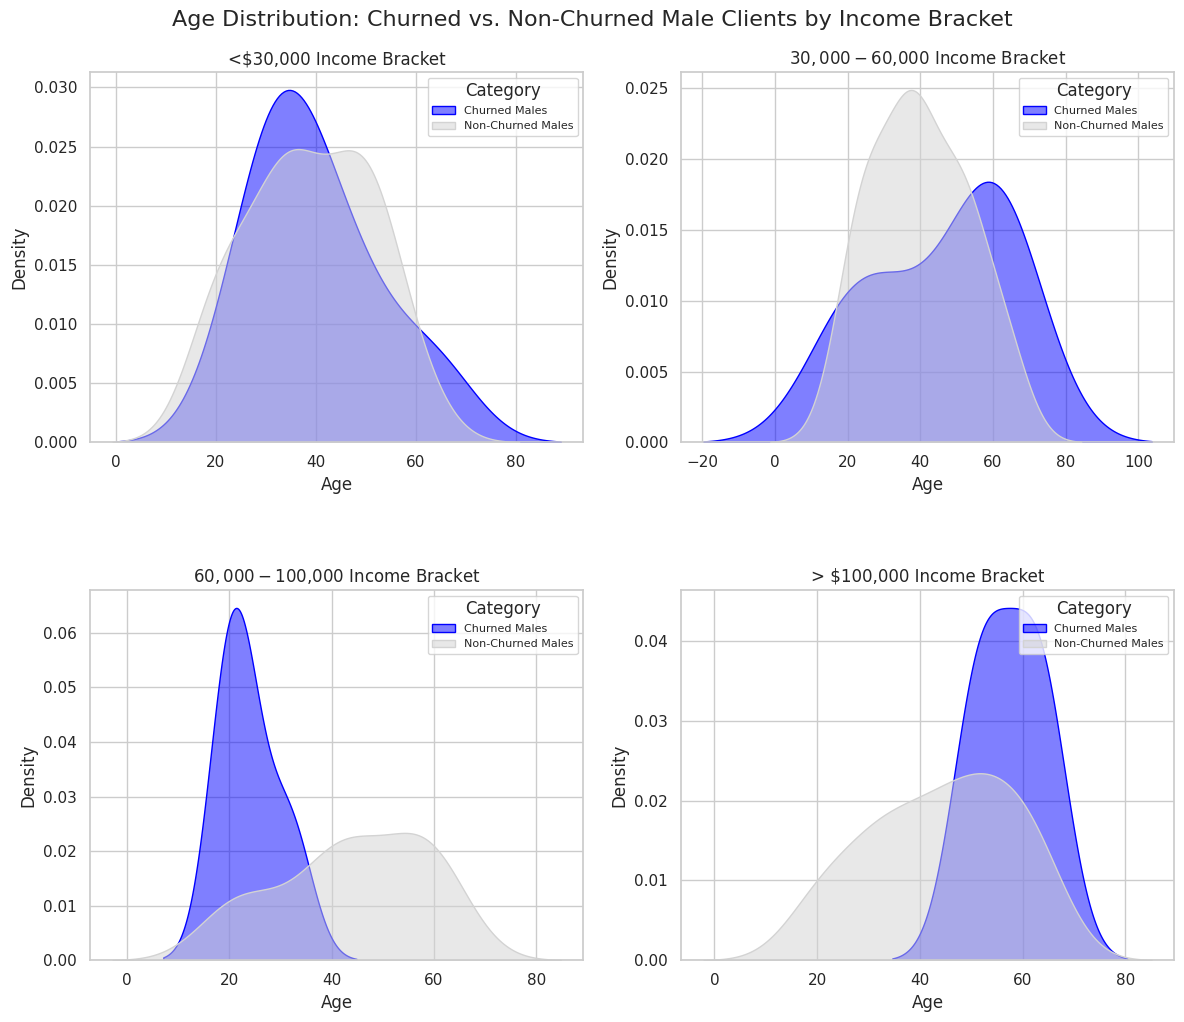

In [20]:
# Suppress specific warnings
warnings.filterwarnings("ignore", category=FutureWarning)

male_clients = df[df["Gender"] == "Male"]

plt.figure(figsize=(12,10))
sns.set_style("whitegrid")
sns.set_palette("pastel")

for i, bracket in enumerate(income_brackets, start=1):
    filtered_male_clients = male_clients[male_clients["Income Bracket"]==bracket]
    #churned and non churned males
    churned_male = filtered_male_clients[filtered_male_clients["Churn"]==True]
    non_churned_male = filtered_male_clients[filtered_male_clients["Churn"]==False]


    # Add a subplot for the current income bracket
    plt.subplot(2, 2, i)
    sns.kdeplot(churned_male["Age"], label="Churned Males", shade=True, color="blue", alpha=0.5)
    sns.kdeplot(non_churned_male["Age"], label="Non-Churned Males", shade=True, color="lightgrey", alpha=0.5)
    plt.title(f"{bracket} Income Bracket", fontsize=12)
    plt.xlabel("Age")
    plt.ylabel("Density")
    plt.legend(title="Category", fontsize=8)
    plt.tight_layout()

# Display the combined chart
plt.suptitle("Age Distribution: Churned vs. Non-Churned Male Clients by Income Bracket", fontsize=16, y=1.02)
plt.subplots_adjust(hspace=0.4)
plt.show()


<ipython-input-21-92eac88080b0>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churned_men['Age Range'] = pd.cut(


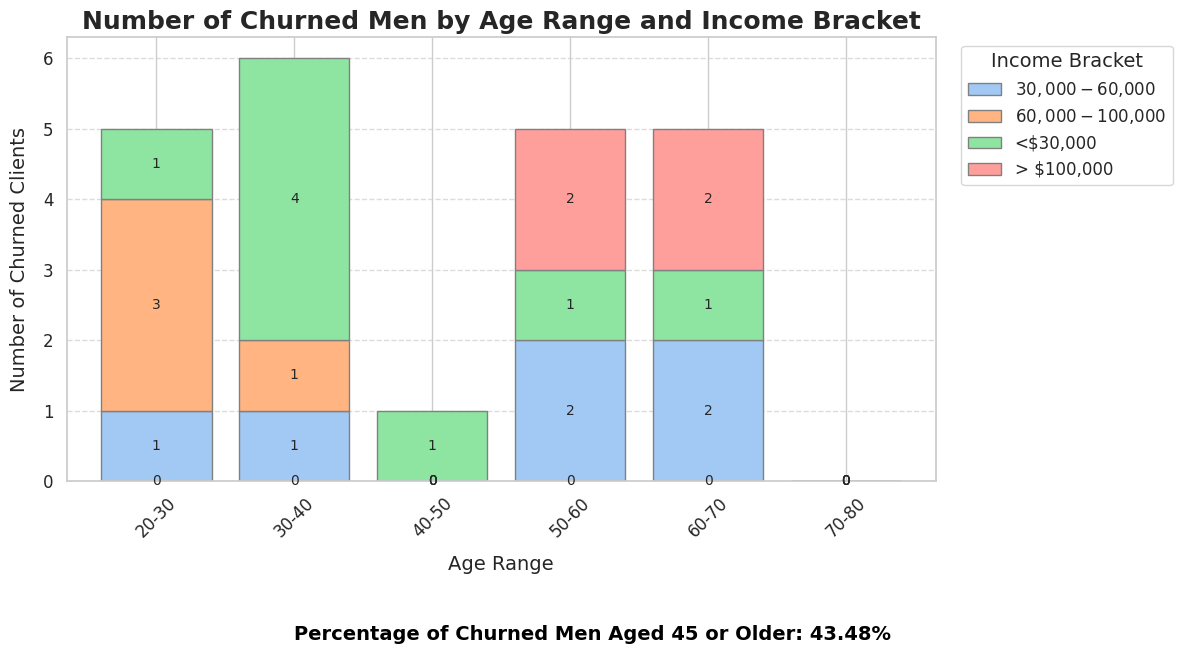

In [21]:
sns.set_theme(style="whitegrid")

# Define age bins and labels
age_bins = range(20, 81, 10)  # Age ranges: 20-30, 30-40, ..., 70-80
age_labels = [f"{i}-{i+10}" for i in age_bins[:-1]]

# Filter the dataset for churned men
churned_men = df[
    (df['Gender'] == 'Male') &
    (df['Churn'] == True)
]

# Create a new column for age ranges
churned_men['Age Range'] = pd.cut(
    churned_men['Age'],
    bins=age_bins,
    labels=age_labels,
    right=False
)

# Group data by age range and income bracket
grouped_data_men = churned_men.groupby(['Age Range', 'Income Bracket']).size().unstack(fill_value=0)

# Calculate percentage of churned men aged 45 or older
total_churned_men = len(churned_men)
churned_45_or_older_men = len(churned_men[churned_men['Age'] >= 45])
percentage_45_or_older_men = (churned_45_or_older_men / total_churned_men) * 100

# Create a pastel color palette
pastel_colors = sns.color_palette("pastel")

# Plot the stacked bar chart
fig, ax = plt.subplots(figsize=(12, 6))
grouped_data_men.plot(
    kind='bar',
    stacked=True,
    ax=ax,
    color=pastel_colors,
    width=0.8,
    edgecolor='grey'
)

# Add titles and labels
ax.set_title('Number of Churned Men by Age Range and Income Bracket', fontsize=18, fontweight='bold')
ax.set_xlabel('Age Range', fontsize=14, labelpad=10)
ax.set_ylabel('Number of Churned Clients', fontsize=14, labelpad=10)

# Customize ticks and legend
ax.tick_params(axis='x', labelsize=12, rotation=45)
ax.tick_params(axis='y', labelsize=12)
ax.legend(
    title='Income Bracket',
    title_fontsize=14,
    fontsize=12,
    loc='upper left',
    bbox_to_anchor=(1.02, 1)
)

# Add gridlines
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate bars with values
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='center', fontsize=10)

# Add the percentage text below the chart
plt.figtext(
    0.5, -0.08,
    f"Percentage of Churned Men Aged 45 or Older: {percentage_45_or_older_men:.2f}%",
    ha='center',
    fontsize=14,
    color='black',
    fontweight='bold'
)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


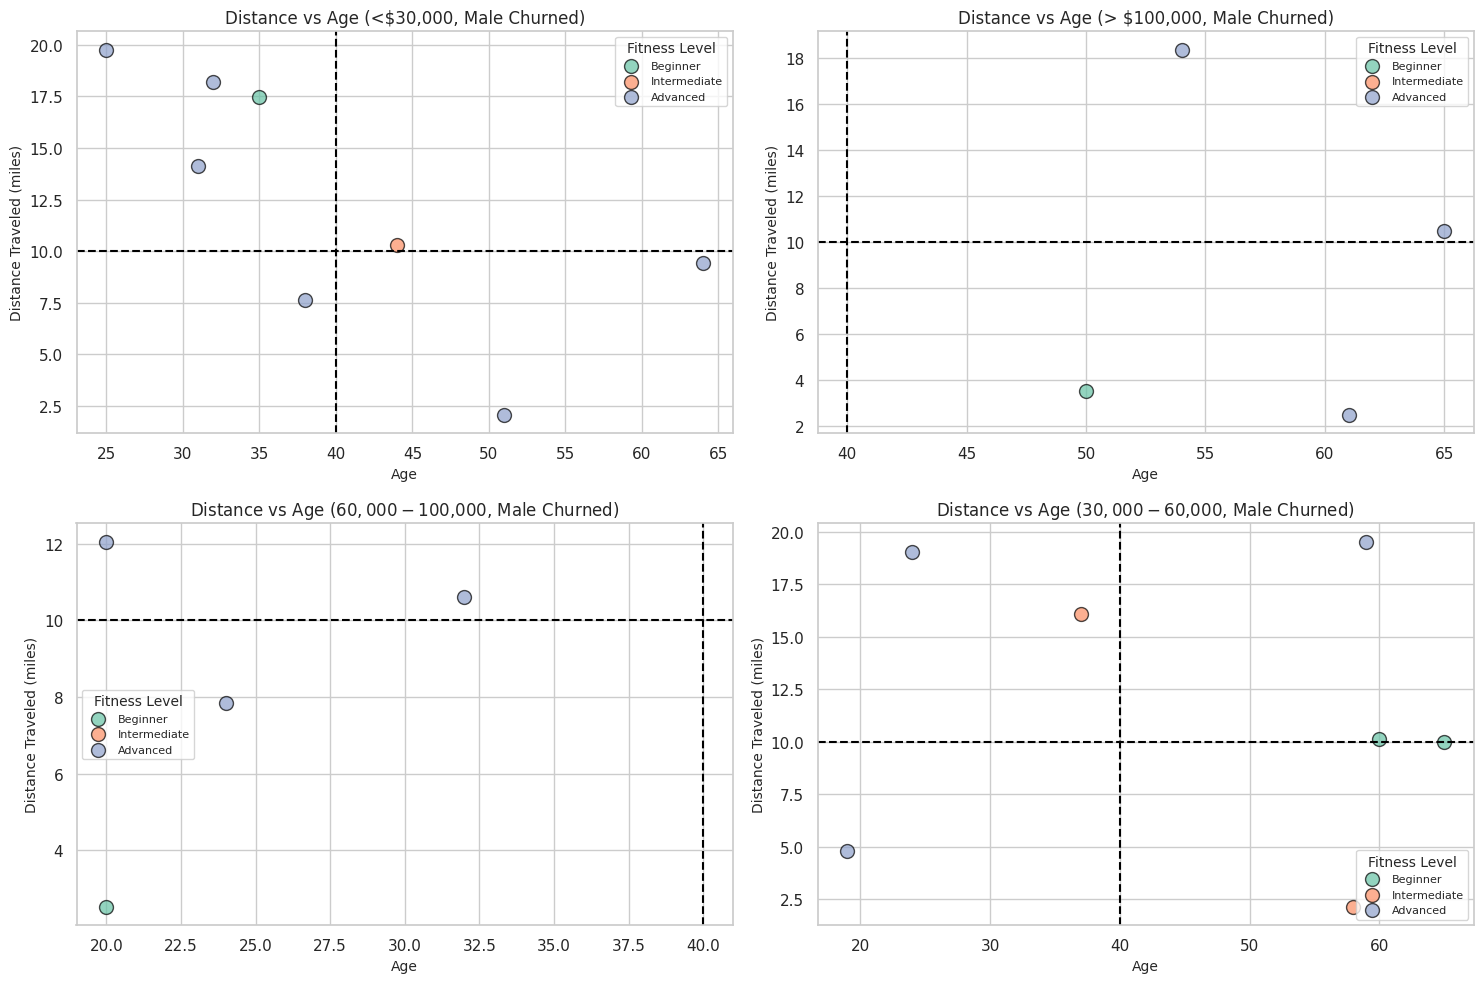

In [22]:

import matplotlib.pyplot as plt

# Define a function to create scatter plots for each income bracket
def scatter_plot_by_income_bracket(ax, income_bracket, df):
    # Filter data for male churned clients in the specific income bracket
    subset = df[
        (df['Income Bracket'] == income_bracket) &
        (df['Churn'] == True) &
        (df['Gender'] == 'Male')
    ]

    # Define a color palette for fitness levels
    fitness_colors = {
        'Beginner': '#66c2a5',      # Green
        'Intermediate': '#fc8d62', # Orange
        'Advanced': '#8da0cb'      # Blue
    }

    for fitness_level, fitness_color in fitness_colors.items():
        fitness_subset = subset[subset['Fitness Level'] == fitness_level]
        ax.scatter(
            fitness_subset['Age'],
            fitness_subset['Member Distance(miles)'],
            color=fitness_color,
            edgecolors='black',  # Black edges for clarity
            marker='o',          # Circle marker for Male
            label=f'{fitness_level}',
            alpha=0.7,
            s=100
        )

    # Add vertical and horizontal lines to divide the chart into quarters
    ax.axvline(x=40, color='black', linestyle='--', linewidth=1.5)  # Vertical line at age 40
    ax.axhline(y=10, color='black', linestyle='--', linewidth=1.5)  # Horizontal line at distance 10 miles

    # Add titles and labels
    ax.set_title(f'Distance vs Age ({income_bracket}, Male Churned)', fontsize=12)
    ax.set_xlabel('Age', fontsize=10)
    ax.set_ylabel('Distance Traveled (miles)', fontsize=10)
    ax.legend(title='Fitness Level', fontsize=8, title_fontsize=10)

# Get all unique income brackets
income_brackets = df['Income Bracket'].unique()

# Set up the subplots
num_brackets = len(income_brackets)
fig, axes = plt.subplots(nrows=(num_brackets + 1) // 2, ncols=2, figsize=(15, 5 * ((num_brackets + 1) // 2)))
axes = axes.flatten()

# Generate scatter plots for each income bracket
for i, income_bracket in enumerate(income_brackets):
    scatter_plot_by_income_bracket(axes[i], income_bracket, df)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


Scatter Plot Data for non-churned Male Clients:


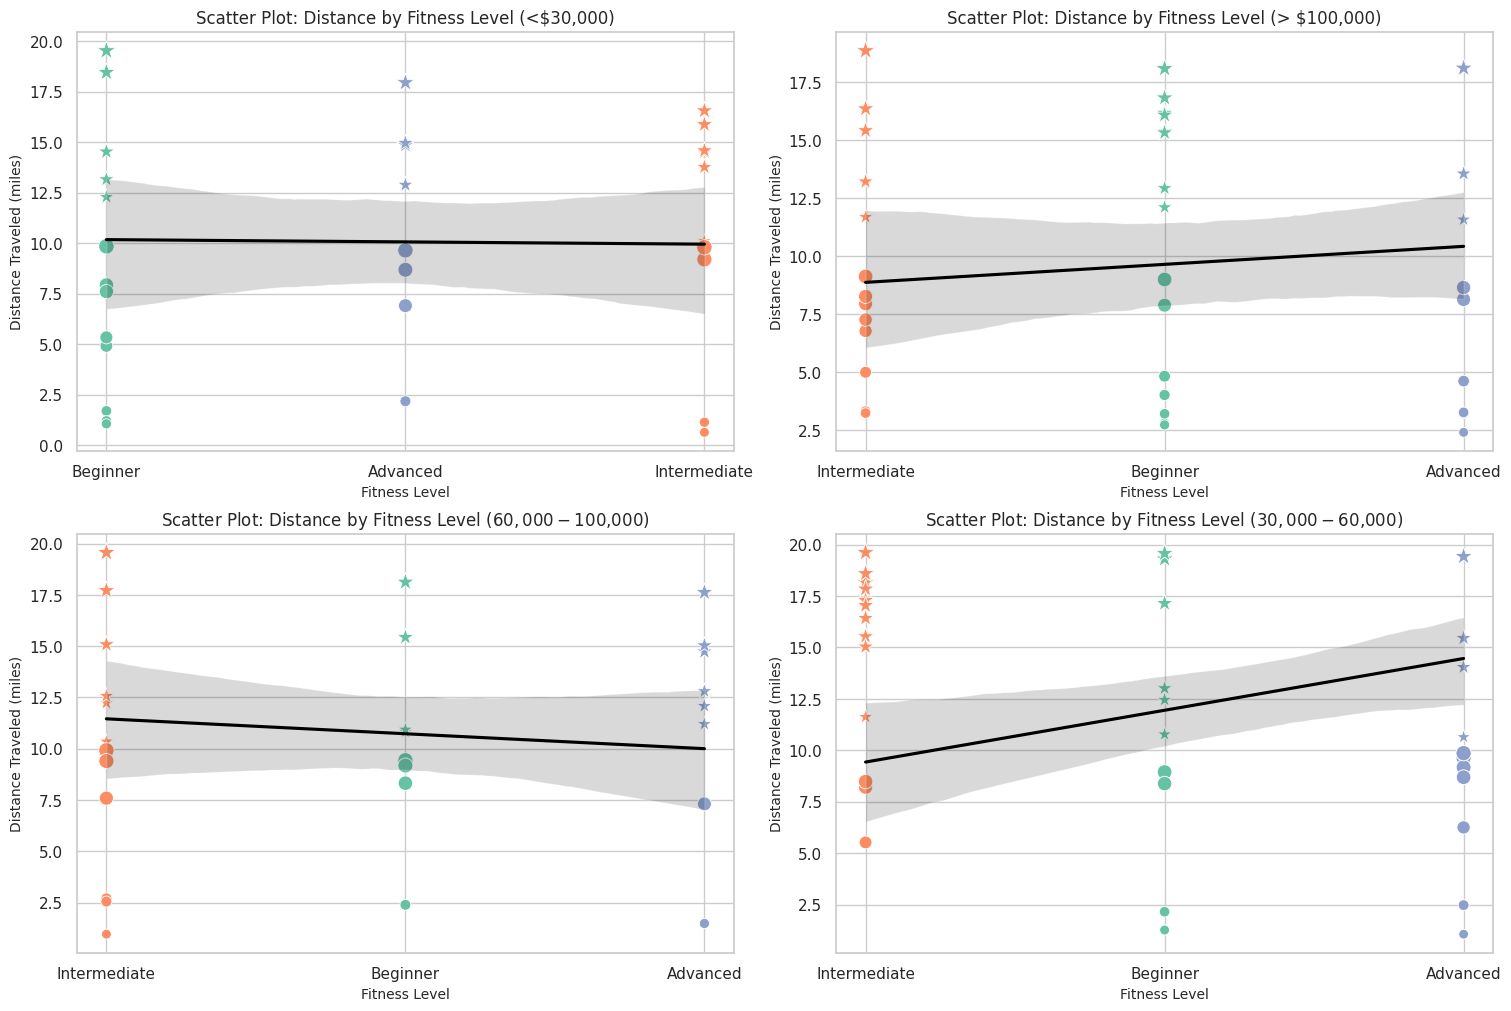

In [23]:
# Filter data for non-churned male clients
non_churned_male_clients = df[
    (df['Churn'] == False) &
    (df['Gender'] == 'Male')
]

# Set up the seaborn style
sns.set_style("whitegrid")

# Set up the figure and axes for subplots
num_brackets = len(df['Income Bracket'].unique())
fig, axes = plt.subplots(nrows=(num_brackets + 1) // 2, ncols=2, figsize=(15, 10), constrained_layout=True)
axes = axes.flatten()

# Define a color palette for scatter plot points
fitness_palette = {
    'Beginner': '#66c2a5',      # Green
    'Intermediate': '#fc8d62', # Orange
    'Advanced': '#8da0cb'      # Blue
}

print("Scatter Plot Data for non-churned Male Clients:")

# Loop through income brackets to create scatter plots
for i, income_bracket in enumerate(df['Income Bracket'].unique()):
    ax = axes[i]
    subset = non_churned_male_clients[non_churned_male_clients['Income Bracket'] == income_bracket]

    # Scatter plot with different markers for distances > 10 miles
    sns.scatterplot(
        ax=ax,
        data=subset,
        x='Fitness Level',
        y='Member Distance(miles)',
        hue='Fitness Level',
        palette=fitness_palette,
        style=subset['Member Distance(miles)'] > 10,  # Different style for distances > 10 miles
        markers={True: '*', False: 'o'},  # Star for > 10 miles, circle otherwise
        size='Member Distance(miles)',  # Size proportional to distance
        sizes=(50, 200),  # Make circles larger
        legend=False
    )

    # Add a trend line with confidence interval (grey area)
    sns.regplot(
        ax=ax,
        data=subset,
        x=pd.Categorical(subset['Fitness Level']).codes,  # Convert categories to numeric for regression
        y='Member Distance(miles)',
        scatter=False,  # Hide scatter points (already plotted)
        color='grey',
        ci=95,  # 95% confidence interval
        line_kws={'color': 'black'},
    )

    # Set plot titles and labels
    ax.set_title(f'Scatter Plot: Distance by Fitness Level ({income_bracket})', fontsize=12)
    ax.set_xlabel('Fitness Level', fontsize=10)
    ax.set_ylabel('Distance Traveled (miles)', fontsize=10)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Show the plot
plt.show()


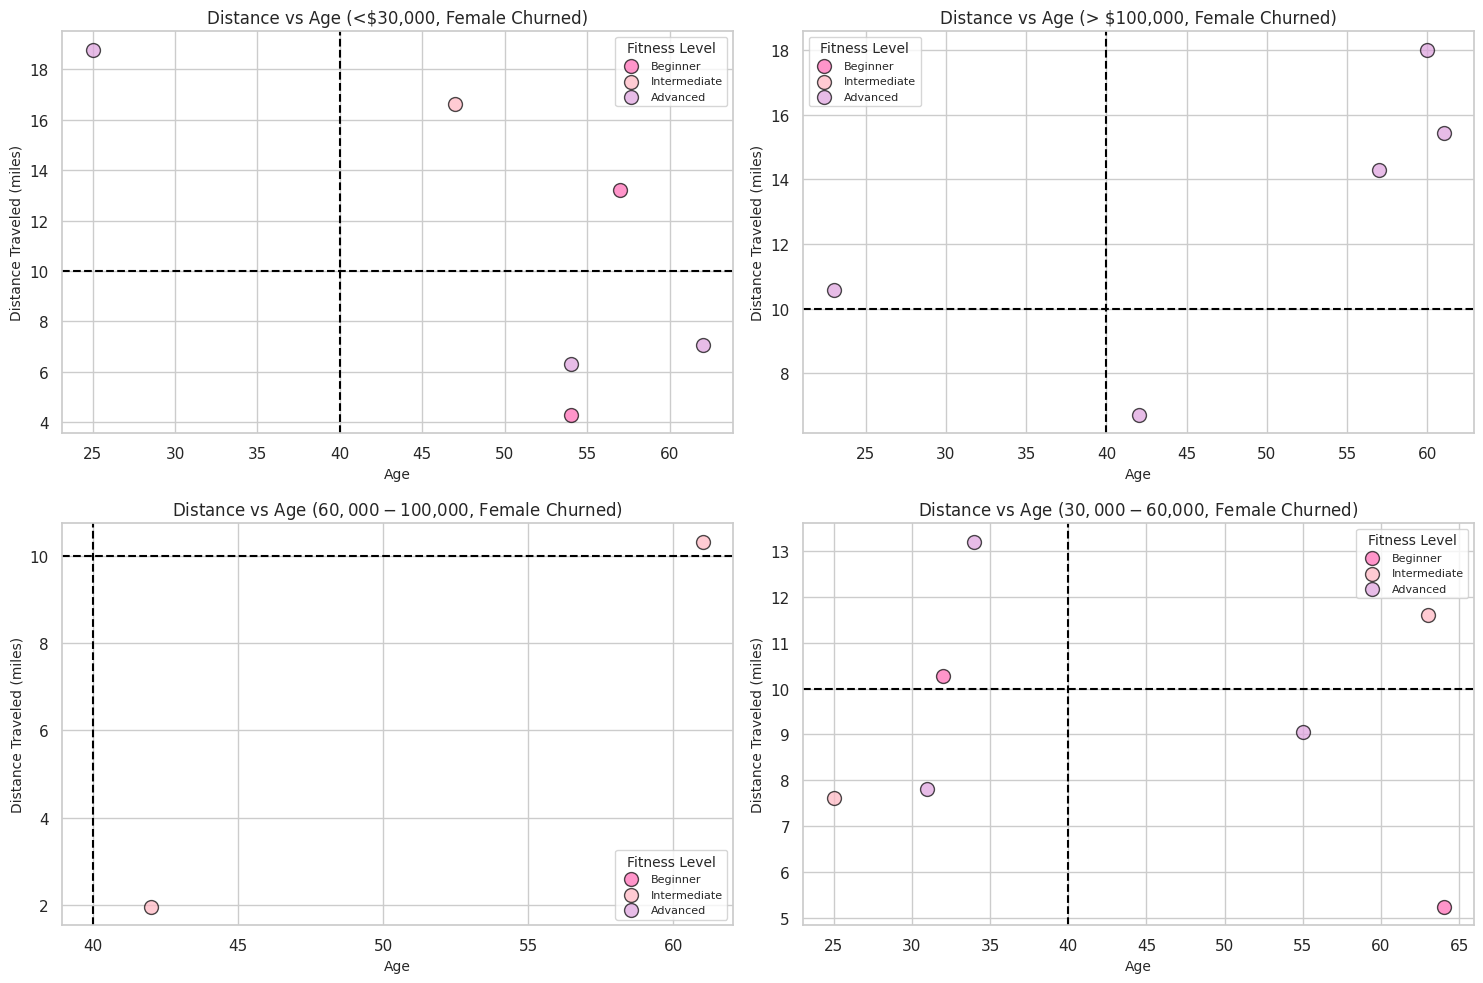

In [24]:
# Define a function to create scatter plots for each income bracket
def scatter_plot_by_income_bracket(ax, income_bracket, df):
    # Filter data for female churned clients in the specific income bracket
    subset = df[
        (df['Income Bracket'] == income_bracket) &
        (df['Churn'] == True) &
        (df['Gender'] == 'Female')
    ]


    fitness_colors = {
        'Beginner': '#ff69b4',      # Hot Pink
        'Intermediate': '#ffb6c1', # Light Pink
        'Advanced': '#dda0dd'      # Plum
    }

    for fitness_level, fitness_color in fitness_colors.items():
        fitness_subset = subset[subset['Fitness Level'] == fitness_level]
        ax.scatter(
            fitness_subset['Age'],
            fitness_subset['Member Distance(miles)'],
            color=fitness_color,
            edgecolors='black',  # Black edges for clarity
            marker='o',          # Circle marker for Female
            label=f'{fitness_level}',
            alpha=0.7,
            s=100
        )

    # Add vertical and horizontal lines to divide the chart into quarters
    ax.axvline(x=40, color='black', linestyle='--', linewidth=1.5)  # Vertical line at age 40
    ax.axhline(y=10, color='black', linestyle='--', linewidth=1.5)  # Horizontal line at distance 10 miles

    # Add titles and labels
    ax.set_title(f'Distance vs Age ({income_bracket}, Female Churned)', fontsize=12)
    ax.set_xlabel('Age', fontsize=10)
    ax.set_ylabel('Distance Traveled (miles)', fontsize=10)
    ax.legend(title='Fitness Level', fontsize=8, title_fontsize=10)

# Get all unique income brackets
income_brackets = df['Income Bracket'].unique()

# Set up the subplots
num_brackets = len(income_brackets)
fig, axes = plt.subplots(nrows=(num_brackets + 1) // 2, ncols=2, figsize=(15, 5 * ((num_brackets + 1) // 2)))
axes = axes.flatten()

# Generate scatter plots for each income bracket
for i, income_bracket in enumerate(income_brackets):
    scatter_plot_by_income_bracket(axes[i], income_bracket, df)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


Scatter Plot Data for non-churned Female Clients:


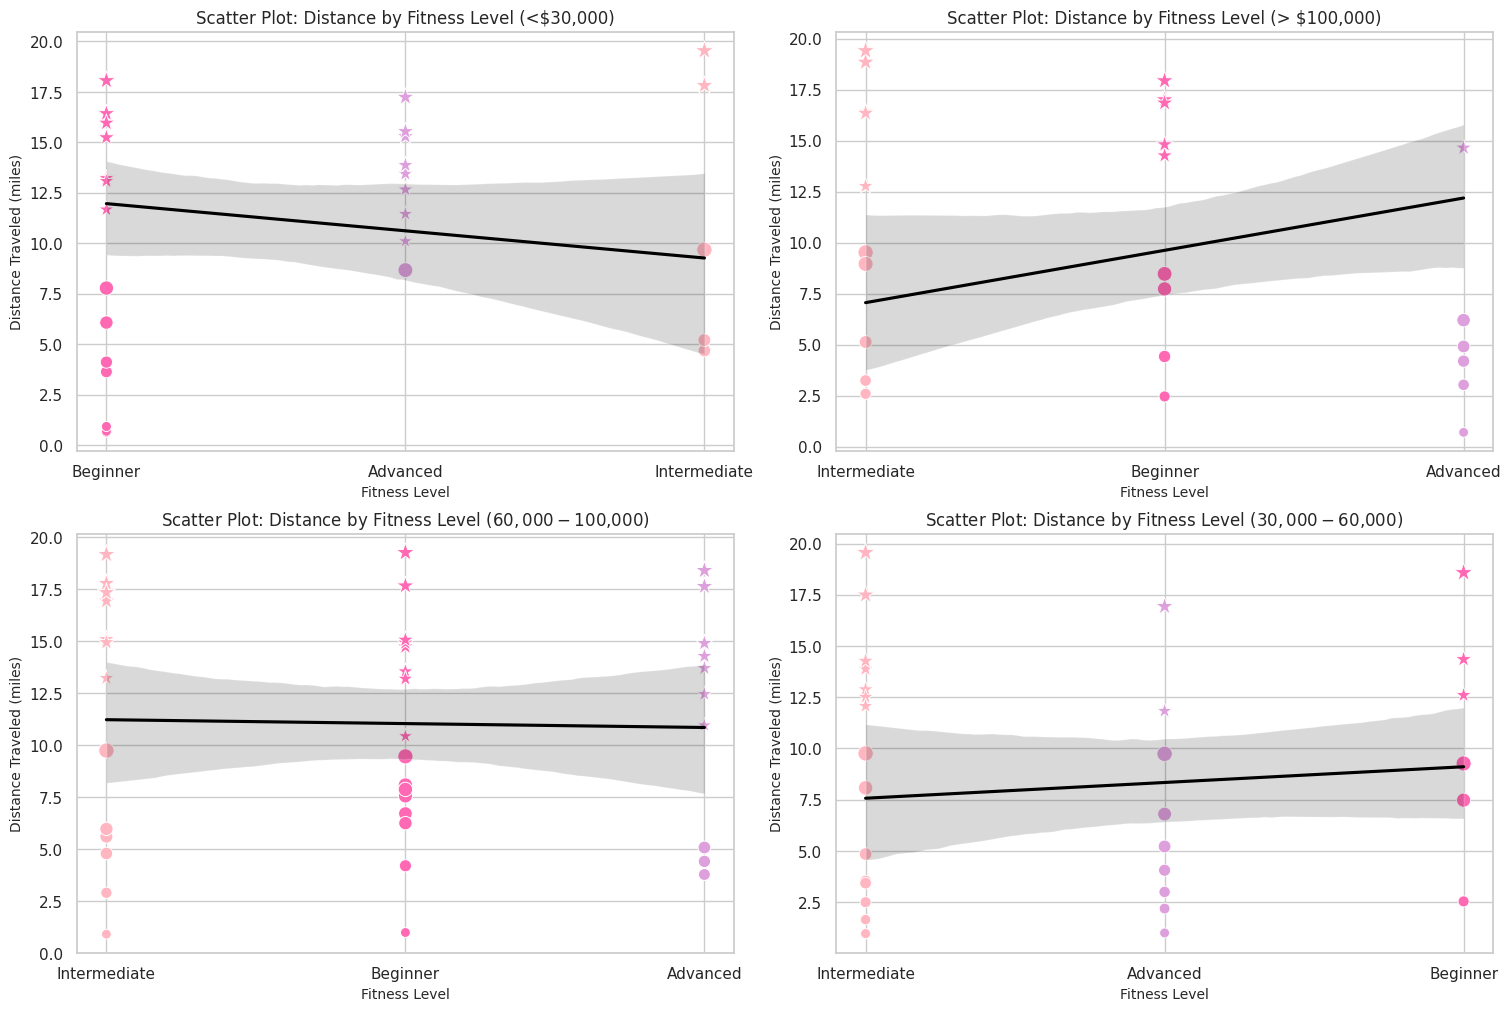

In [25]:
# Filter data for non-churned male clients
non_churned_female_clients = df[
    (df['Churn'] == False) &
    (df['Gender'] == 'Female')
]

# Set up the seaborn style
sns.set_style("whitegrid")

# Set up the figure and axes for subplots
num_brackets = len(df['Income Bracket'].unique())
fig, axes = plt.subplots(nrows=(num_brackets + 1) // 2, ncols=2, figsize=(15, 10), constrained_layout=True)
axes = axes.flatten()

# Define a color palette for scatter plot points
fitness_palette = {
    'Beginner': '#ff69b4',
    'Intermediate': '#ffb6c1',
    'Advanced': '#dda0dd'
}

print("Scatter Plot Data for non-churned Female Clients:")

# Loop through income brackets to create scatter plots
for i, income_bracket in enumerate(df['Income Bracket'].unique()):
    ax = axes[i]
    subset = non_churned_female_clients[non_churned_female_clients['Income Bracket'] == income_bracket]

    # Scatter plot with different markers for distances > 10 miles
    sns.scatterplot(
        ax=ax,
        data=subset,
        x='Fitness Level',
        y='Member Distance(miles)',
        hue='Fitness Level',
        palette=fitness_palette,
        style=subset['Member Distance(miles)'] > 10,  # Different style for distances > 10 miles
        markers={True: '*', False: 'o'},  # Star for > 10 miles, circle otherwise
        size='Member Distance(miles)',  # Size proportional to distance
        sizes=(50, 200),  # Make circles larger
        legend=False
    )

    # Add a trend line with confidence interval (grey area)
    sns.regplot(
        ax=ax,
        data=subset,
        x=pd.Categorical(subset['Fitness Level']).codes,  # Convert categories to numeric for regression
        y='Member Distance(miles)',
        scatter=False,  # Hide scatter points (already plotted)
        color='grey',
        ci=95,  # 95% confidence interval
        line_kws={'color': 'black'},
    )

    # Set plot titles and labels
    ax.set_title(f'Scatter Plot: Distance by Fitness Level ({income_bracket})', fontsize=12)
    ax.set_xlabel('Fitness Level', fontsize=10)
    ax.set_ylabel('Distance Traveled (miles)', fontsize=10)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Show the plot
plt.show()

Histogram Data for Churned Male Clients:


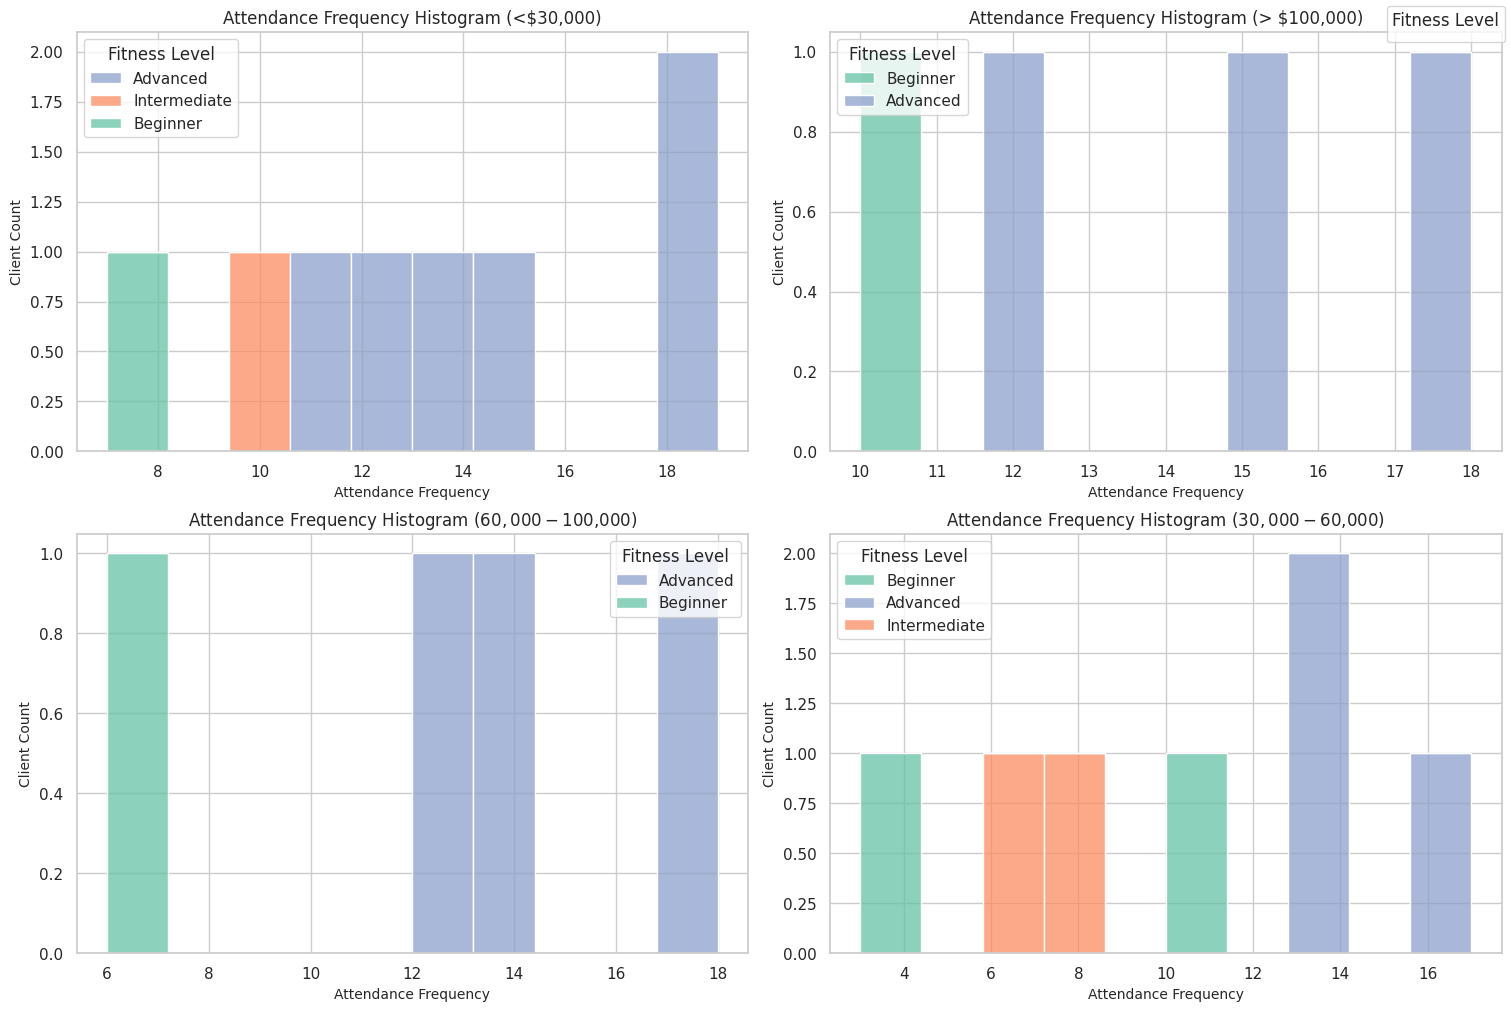

In [26]:
churned_male_clients = df[(df['Gender'] == 'Male') & (df['Churn'] == True)]

# Set up the seaborn style
sns.set_style("whitegrid")

# Set up the figure and axes for subplots
num_brackets = len(df['Income Bracket'].unique())
fig, axes = plt.subplots(nrows=(num_brackets + 1) // 2, ncols=2, figsize=(15, 10), constrained_layout=True)
axes = axes.flatten()

# Define a palette for fitness levels
fitness_palette = {
    'Beginner': '#66c2a5',      # Green
    'Intermediate': '#fc8d62', # Orange
    'Advanced': '#8da0cb'      # Blue
}

print("Histogram Data for Churned Male Clients:")

# Loop through income brackets to create histograms
for i, income_bracket in enumerate(df['Income Bracket'].unique()):
    ax = axes[i]
    subset = churned_male_clients[churned_male_clients['Income Bracket'] == income_bracket]

    # Plot the histogram for attendance frequency, colored by fitness level
    sns.histplot(
        ax=ax,
        data=subset,
        x='Attendance Frequency',
        hue='Fitness Level',  # Use fitness level for coloring
        multiple='stack',     # Stack the bars
        bins=10,              # Number of bins
        palette=fitness_palette
    )

    # Set plot titles and labels
    ax.set_title(f'Attendance Frequency Histogram ({income_bracket})', fontsize=12)
    ax.set_xlabel('Attendance Frequency', fontsize=10)
    ax.set_ylabel('Client Count', fontsize=10)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Add a legend for fitness levels
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, title="Fitness Level", loc='upper right', fontsize=10)

# Show the plot
plt.show()

Histogram Data for Non-Churned Male Clients:


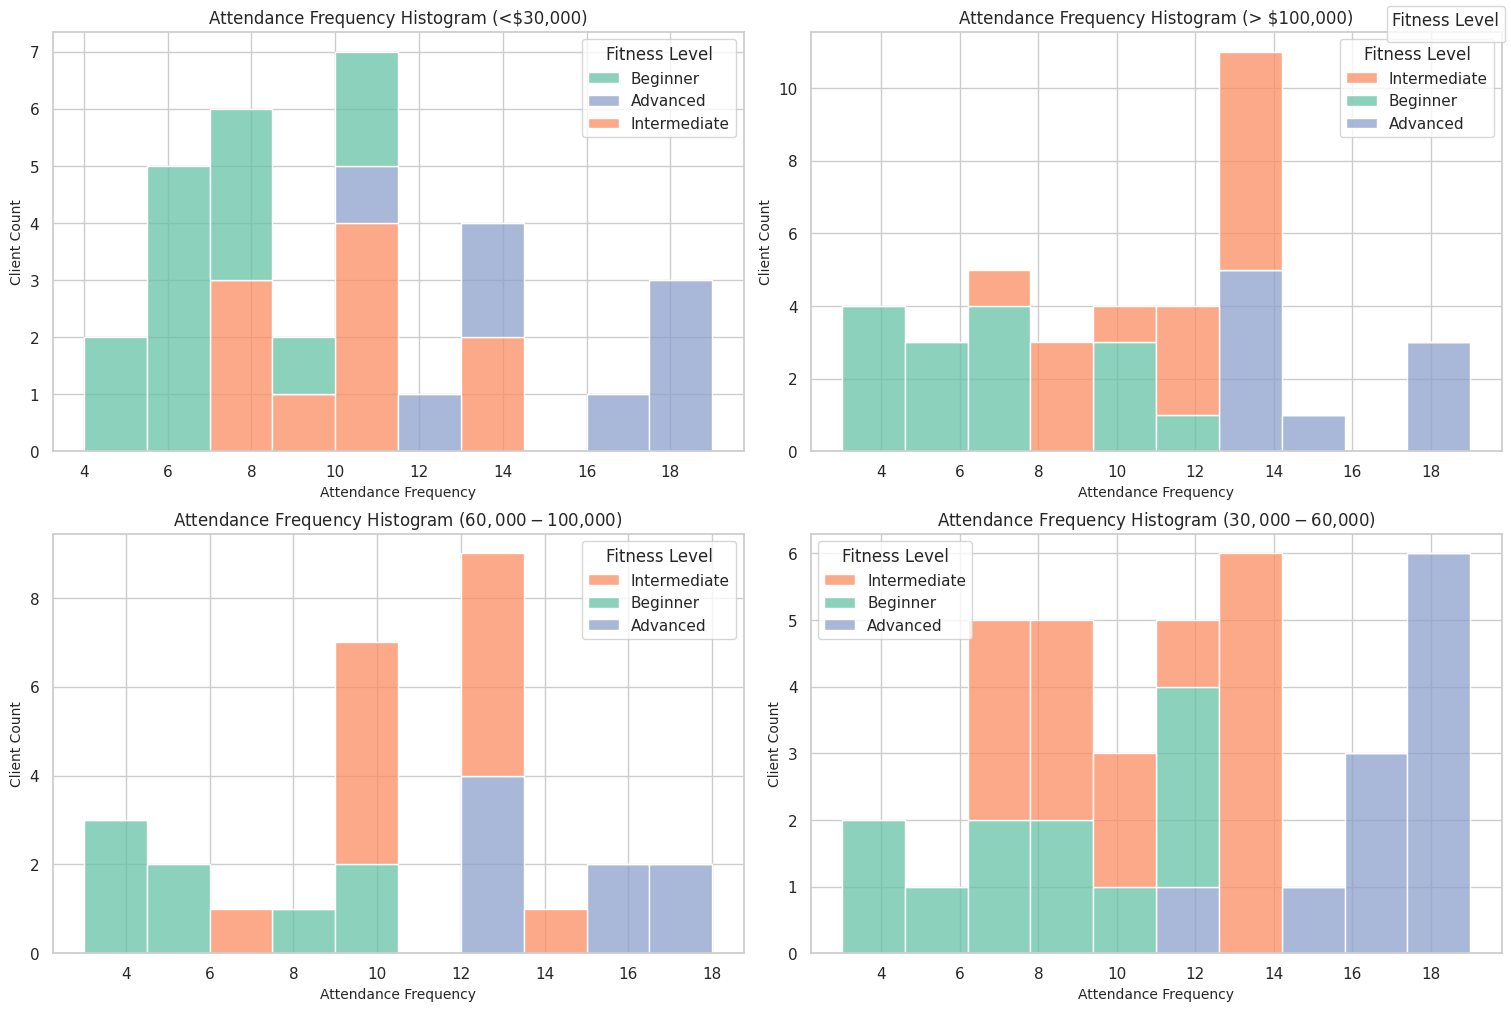

In [27]:
non_churned_male_clients = df[(df['Gender'] == 'Male') & (df['Churn'] == False)]

# Set up the seaborn style
sns.set_style("whitegrid")

# Set up the figure and axes for subplots
num_brackets = len(df['Income Bracket'].unique())
fig, axes = plt.subplots(nrows=(num_brackets + 1) // 2, ncols=2, figsize=(15, 10), constrained_layout=True)
axes = axes.flatten()

# Define a palette for fitness levels
fitness_palette = {
    'Beginner': '#66c2a5',      # Green
    'Intermediate': '#fc8d62', # Orange
    'Advanced': '#8da0cb'      # Blue
}

print("Histogram Data for Non-Churned Male Clients:")

# Loop through income brackets to create histograms
for i, income_bracket in enumerate(df['Income Bracket'].unique()):
    ax = axes[i]
    subset = non_churned_male_clients[non_churned_male_clients['Income Bracket'] == income_bracket]

    # Plot the histogram for attendance frequency, colored by fitness level
    sns.histplot(
        ax=ax,
        data=subset,
        x='Attendance Frequency',
        hue='Fitness Level',  # Use fitness level for coloring
        multiple='stack',     # Stack the bars
        bins=10,              # Number of bins
        palette=fitness_palette
    )

    # Set plot titles and labels
    ax.set_title(f'Attendance Frequency Histogram ({income_bracket})', fontsize=12)
    ax.set_xlabel('Attendance Frequency', fontsize=10)
    ax.set_ylabel('Client Count', fontsize=10)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Add a legend for fitness levels
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, title="Fitness Level", loc='upper right', fontsize=10)

# Show the plot
plt.show()

Histogram Data for Churned Female Clients


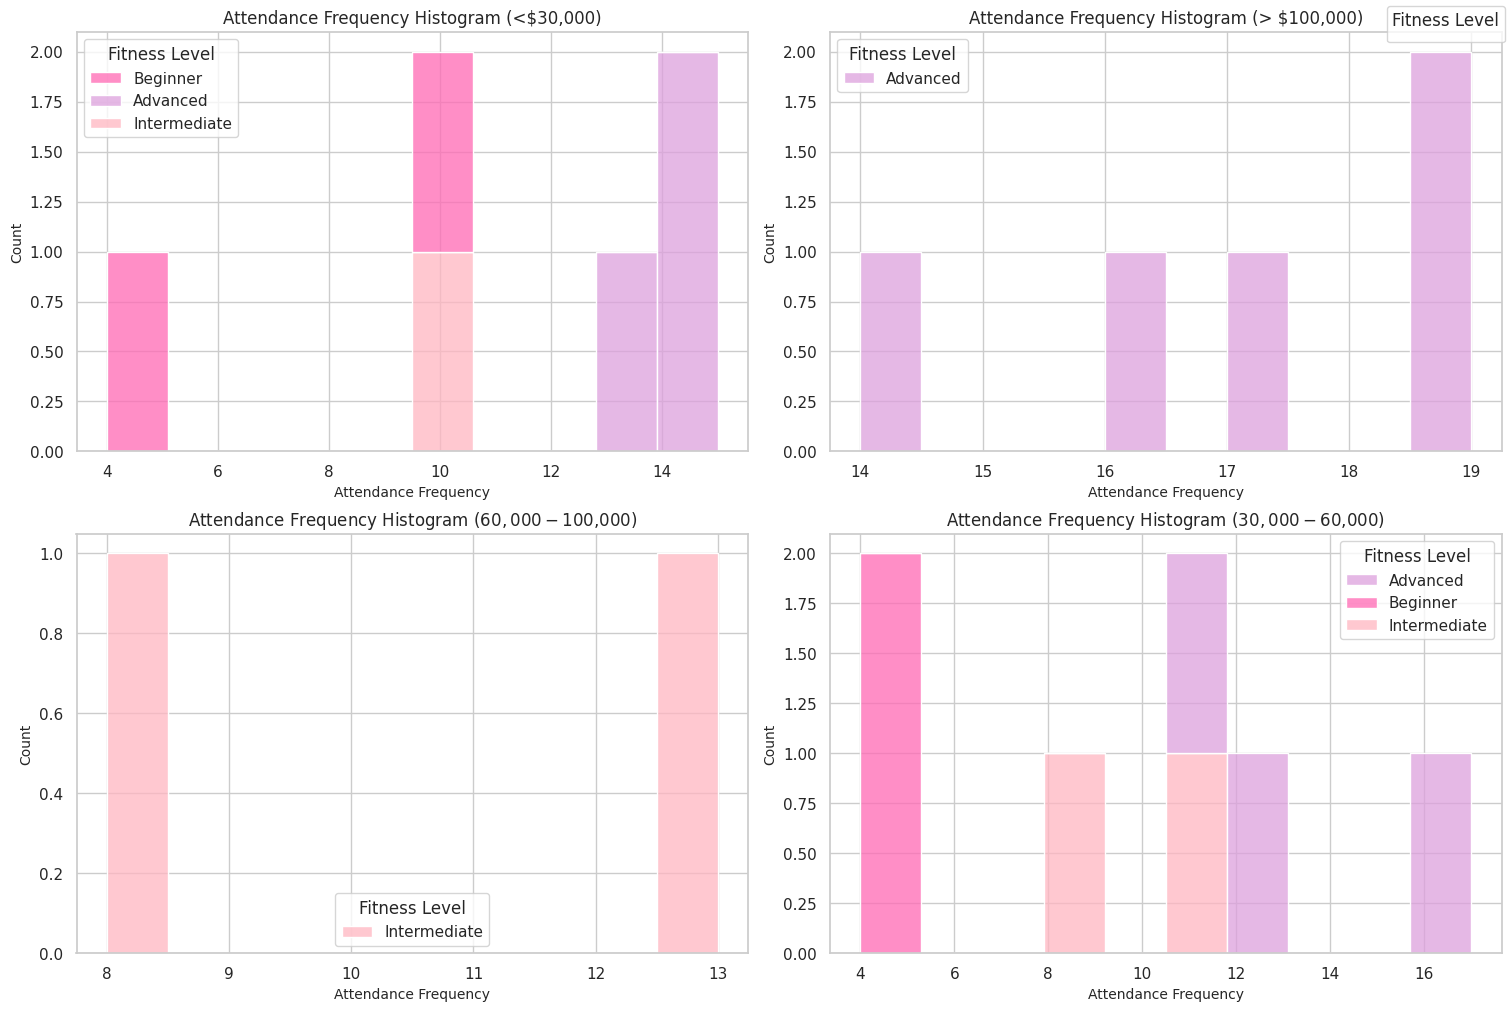

In [28]:
churned_female_clients =df[(df['Gender'] == 'Female') & (df['Churn']==True)]

sns.set_style("whitegrid")

nun_brackets = len(df['Income Bracket'].unique())
fig, axes = plt.subplots(nrows=(num_brackets +1) //2, ncols=2, figsize=(15,10), constrained_layout=True)
axes = axes.flatten()

fitness_palette = {
    'Beginner' : '#ff69b4',
    'Intermediate':'#ffb6c1',
    'Advanced':'#dda0dd'

}

print("Histogram Data for Churned Female Clients")
#Looping through each cahrt
for i, income_bracket in enumerate(df['Income Bracket'].unique()):
    ax = axes[i]
    subset = churned_female_clients[churned_female_clients['Income Bracket'] == income_bracket]
    #
    sns.histplot(
        ax=ax,
        data=subset,
        x='Attendance Frequency',
        hue = 'Fitness Level',
        multiple= 'stack',
        bins=10,
        palette=fitness_palette
    )
    #
      # Set plot titles and labels
    ax.set_title(f'Attendance Frequency Histogram ({income_bracket})', fontsize=12)
    ax.set_xlabel('Attendance Frequency', fontsize=10)
    ax.set_ylabel('Count', fontsize=10)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Add a legend for fitness levels
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, title="Fitness Level", loc='upper right', fontsize=10)

# Show the plot
plt.show()

Histogram Data for Non Churned Female Clients


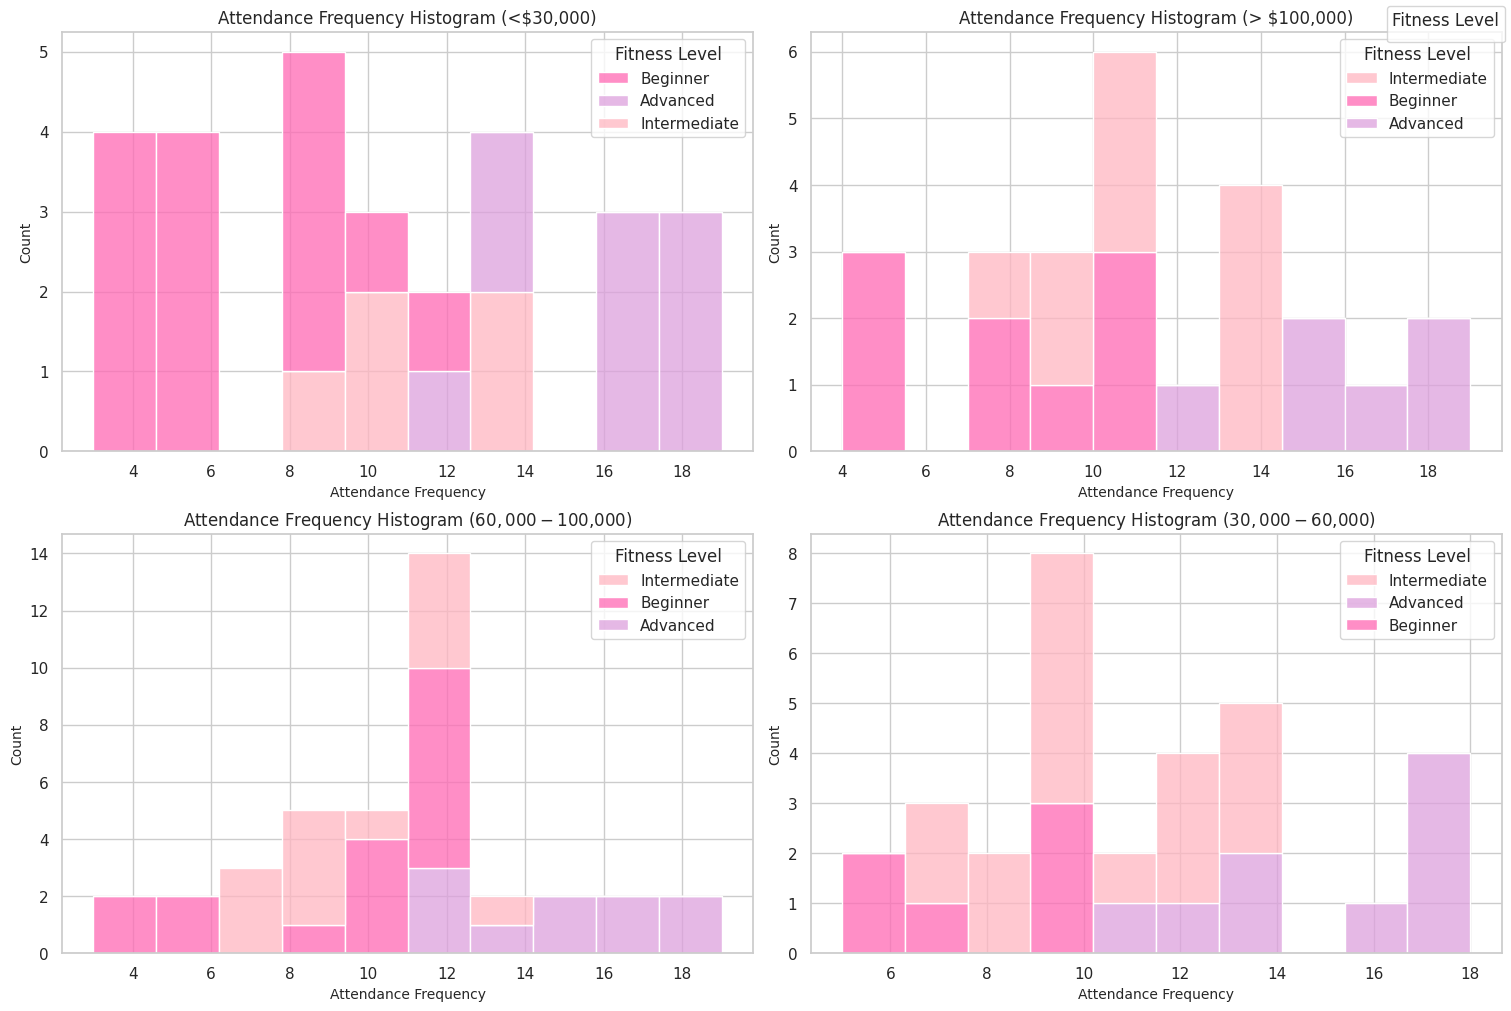

In [29]:
non_churned_female_clients =df[(df['Gender'] == 'Female') & (df['Churn']==False)]

sns.set_style("whitegrid")

nun_brackets = len(df['Income Bracket'].unique())
fig, axes = plt.subplots(nrows=(num_brackets +1) //2, ncols=2, figsize=(15,10), constrained_layout=True)
axes = axes.flatten()

fitness_palette = {
    'Beginner' : '#ff69b4',
    'Intermediate':'#ffb6c1',
    'Advanced':'#dda0dd'

}

print("Histogram Data for Non Churned Female Clients")
#Looping through each cahrt
for i, income_bracket in enumerate(df['Income Bracket'].unique()):
    ax = axes[i]
    subset = non_churned_female_clients[non_churned_female_clients['Income Bracket'] == income_bracket]
    #
    sns.histplot(
        ax=ax,
        data=subset,
        x='Attendance Frequency',
        hue = 'Fitness Level',
        multiple= 'stack',
        bins=10,
        palette=fitness_palette
    )
    #
      # Set plot titles and labels
    ax.set_title(f'Attendance Frequency Histogram ({income_bracket})', fontsize=12)
    ax.set_xlabel('Attendance Frequency', fontsize=10)
    ax.set_ylabel('Count', fontsize=10)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Add a legend for fitness levels
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, title="Fitness Level", loc='upper right', fontsize=10)

# Show the plot
plt.show()